# ***Task 1. Basic Statistic Analysis***



In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import normaltest

In [38]:
df_temp = pd.read_csv('SaYoPillow.csv')
#Renaming columns for better understanding
df = df_temp.rename(columns={'sr':'snoring_range','rr':'respitory_range','t':'temperature','lm':'limb_movement_rate','bo':'oxygen_in_blood','rem':'rapid_eye_movement','sr.1':'number_of_hours_of_sleep','hr':'heart_rate','sl':'stress_level'}, inplace=True)
columns_required = ['number_of_hours_of_sleep', 'respitory_range', 'heart_rate', 'oxygen_in_blood', 'rapid_eye_movement']

# Ensuring the DataFrame only contains the columns of interest
df = df_temp[columns_required]
df.head()

,number_of_hours_of_sleep,respitory_range,heart_rate,oxygen_in_blood,rapid_eye_movement
0,1.840,25.680,74.20,89.840,99.60
1,1.552,25.104,72.76,89.552,98.88
2,7.000,20.000,60.00,95.000,85.00
3,0.768,23.536,68.84,88.768,96.92
4,8.248,17.248,53.12,96.248,72.48


1.1 For each variable Xi, i.e., column in the data set corresponding to Xi, calculate the following:
histogram, mean, variance.


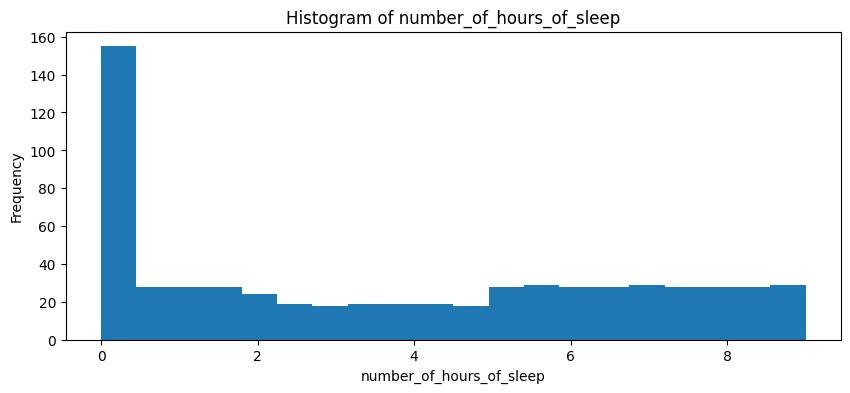

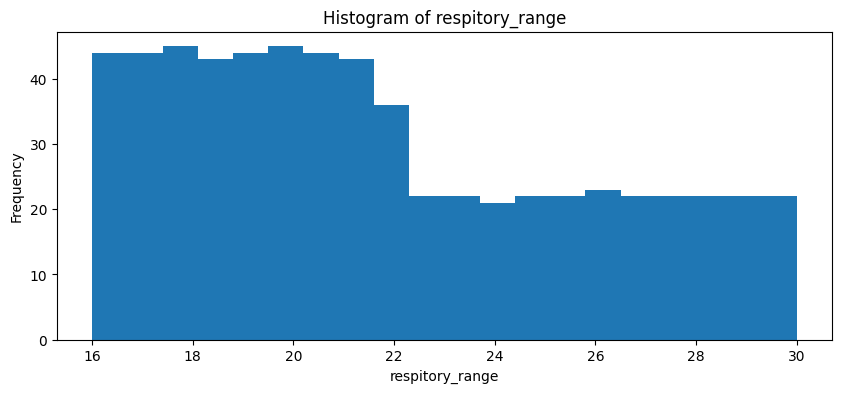

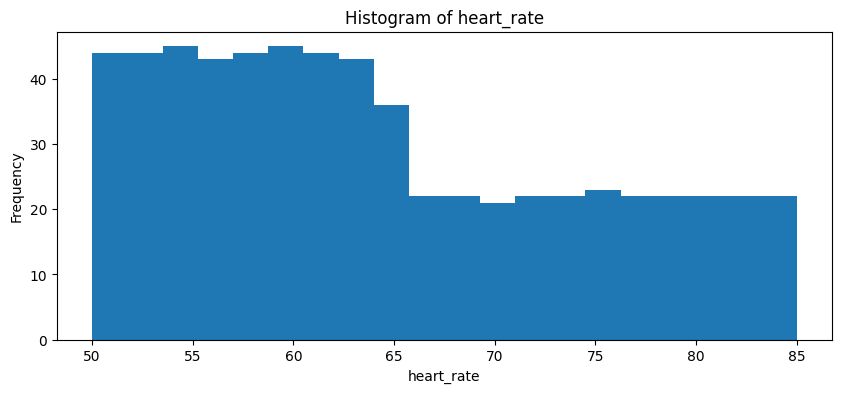

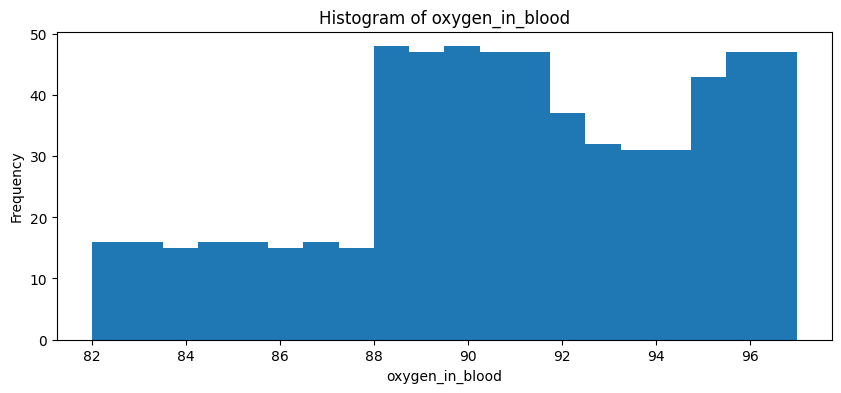

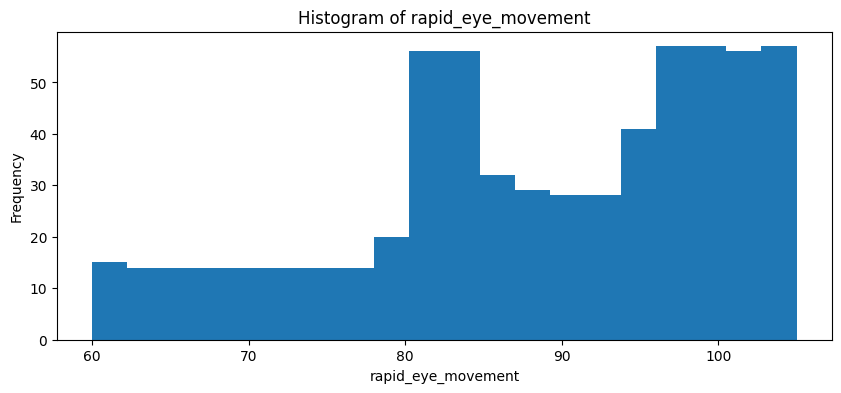

In [33]:
for col in columns_required:
    # Histogram
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.hist(df[col], bins=20)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(False)
    plt.show()

In [5]:
for col in columns_required:
    # Mean
    mean_value = df[col].mean()
    print(f'Mean of {col}: {mean_value}')

Mean of number_of_hours_of_sleep: 3.7
Mean of respitory_range: 21.8
Mean of heart_rate: 64.5
Mean of oxygen_in_blood: 90.9
Mean of rapid_eye_movement: 88.5


In [6]:
for col in columns_required:
    # Variance
    variance_value = df[col].var()
    print(f'Variance of {col}: {variance_value}\n')

Variance of number_of_hours_of_sleep: 9.330410174880763

Variance of respitory_range: 15.730034976152622

Variance of heart_rate: 98.31271860095389

Variance of oxygen_in_blood: 15.229373608903021

Variance of rapid_eye_movement: 141.46120826709063



1.2 Use a box plot or any other function to remove outliers (do not over do it!). This can also be done
during the model building phase (see Tasks 2 and 3). Here the objective is to observe the correlation.


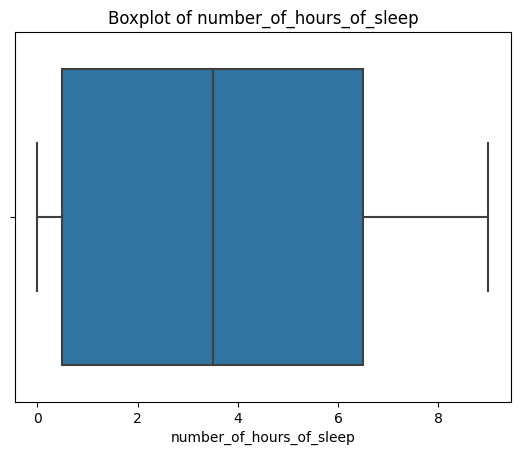

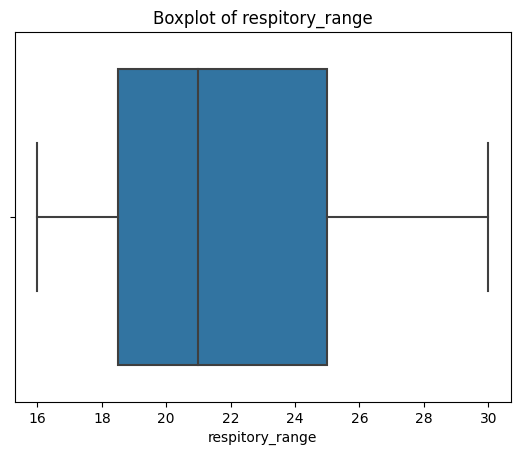

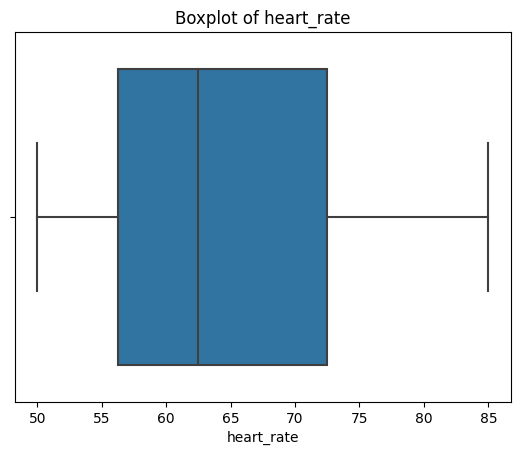

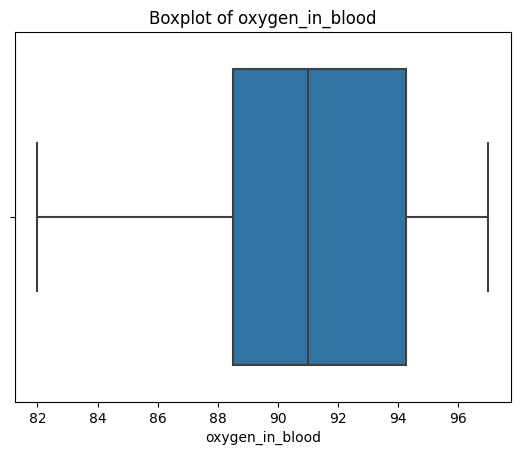

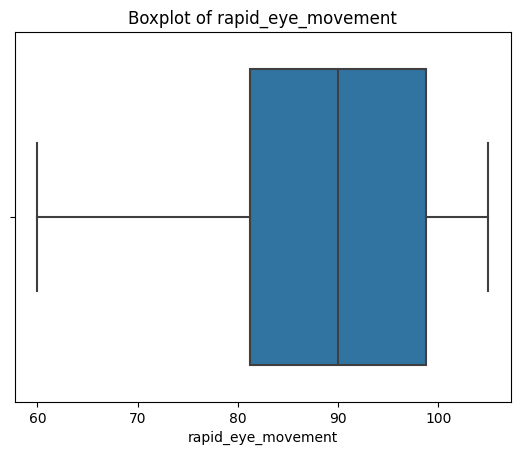

In [7]:
for i, var in enumerate(columns_required):
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    # plt.tight_layout()
    plt.show()

In [34]:
# Checking for outliers
outliers = {}

for var in columns_required:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame rows where var is outside the lower and upper bounds
    outliers[var] = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    
    # You can also directly calculate the number of outliers
    num_outliers = ((df[var] < lower_bound) | (df[var] > upper_bound)).sum()
    print(f"{var} has {num_outliers} outliers")
    print('Outliers for :',var)
    print(outliers[var])

number_of_hours_of_sleep has 0 outliers
Outliers for : number_of_hours_of_sleep
Empty DataFrame
Columns: [number_of_hours_of_sleep, respitory_range, heart_rate, oxygen_in_blood, rapid_eye_movement]
Index: []
respitory_range has 0 outliers
Outliers for : respitory_range
Empty DataFrame
Columns: [number_of_hours_of_sleep, respitory_range, heart_rate, oxygen_in_blood, rapid_eye_movement]
Index: []
heart_rate has 0 outliers
Outliers for : heart_rate
Empty DataFrame
Columns: [number_of_hours_of_sleep, respitory_range, heart_rate, oxygen_in_blood, rapid_eye_movement]
Index: []
oxygen_in_blood has 0 outliers
Outliers for : oxygen_in_blood
Empty DataFrame
Columns: [number_of_hours_of_sleep, respitory_range, heart_rate, oxygen_in_blood, rapid_eye_movement]
Index: []
rapid_eye_movement has 0 outliers
Outliers for : rapid_eye_movement
Empty DataFrame
Columns: [number_of_hours_of_sleep, respitory_range, heart_rate, oxygen_in_blood, rapid_eye_movement]
Index: []


***Since There are no outliers we are not removing any data points from the dataset***

---

1.3 Calculate the correlation matrix for all variables, i.e., Y;X1;X2;X3;X4 and X5 (if you have 5 variables). Note that the correlation matrix is a matrix with correlation coeffcients for a pair of variables,
which can be obtained by either coding or a statistical package.


In [42]:
# df = pd.read_csv('SaYoPillow.csv')
# df.rename(columns={'sr':'snoring_range','rr':'respitory_range','t':'temperature','lm':'limb_movement_rate','bo':'oxygen_in_blood','rem':'rapid_eye_movement','sr.1':'number_of_hours_of_sleep','hr':'heart_rate','sl':'stress_level'}, inplace=True)
# columns_required = ['number_of_hours_of_sleep', 'respitory_range', 'heart_rate', 'oxygen_in_blood', 'rapid_eye_movement']

# # To avoid truncation of OP
# pd.set_option('display.max_colwidth', None)
# # Ensuring the DataFrame only contains the columns of interest
# df = df[columns_required]
output_column = 'stress_level'
df = df_temp[columns_required + [output_column]]
correlation_matrix = df.corr()
correlation_matrix

,number_of_hours_of_sleep,respitory_range,heart_rate,oxygen_in_blood,rapid_eye_movement,stress_level
number_of_hours_of_sleep,1.000000,-0.891855,-0.891855,0.950189,-0.893952,-0.973036
respitory_range,-0.891855,1.000000,1.000000,-0.889210,0.935572,0.963516
heart_rate,-0.891855,1.000000,1.000000,-0.889210,0.935572,0.963516
oxygen_in_blood,0.950189,-0.889210,-0.889210,1.000000,-0.862136,-0.961092
rapid_eye_movement,-0.893952,0.935572,0.935572,-0.862136,1.000000,0.951988
stress_level,-0.973036,0.963516,0.963516,-0.961092,0.951988,1.000000


1.4 Draw conclusions related to possible dependencies among these variables. Comment on your results,
that is, whether these is a strong or weak correlation (r is close to 1 or not), positive or negative
correlation, etc.

Based on the correlation matrix image you provided, here are some conclusions related to the possible dependencies among the variables:

1. **number_of_hours_of_sleep**:
    - Shows a very strong positive correlation with *oxygen_in_blood* (r = 0.950189). This suggests that as the number of hours of sleep increases, the oxygen level in the blood also tends to increase significantly.
    - Has a strong negative correlation with *respitory_range*, *heart_rate*, and *rapid_eye_movement* (r values around -0.89). This indicates that more hours of sleep are associated with lower respiratory rates, lower heart rates, and less rapid eye movement.
    - Has a very strong negative correlation with *stress_level* (r = -0.973036), meaning higher hours of sleep might be related to lower stress levels.

2. **respitory_range** and **heart_rate**:
    - Both have a perfect positive correlation with each other (r = 1.000000). This is likely because they are physiologically connected; when respiratory rate increases, the heart rate often increases to match the oxygen and carbon dioxide exchange demands.
    - Both show very strong negative correlations with *number_of_hours_of_sleep* and *stress_level* and strong positive correlations with *rapid_eye_movement*.

3. **oxygen_in_blood**:
    - Has a strong negative correlation with *respitory_range* and *heart_rate* (r ≈ -0.889210), which may indicate that lower respiratory and heart rates are associated with higher oxygen saturation in the blood.
    - Shows a very strong negative correlation with *stress_level* (r = -0.961092).

4. **rapid_eye_movement**:
    - Exhibits strong positive correlations with *respitory_range* and *heart_rate* (r ≈ 0.935572). This suggests that periods with more rapid eye movement are associated with higher respiratory and heart rates.
    - Shows a very strong positive correlation with *stress_level* (r = 0.951988), possibly indicating that increased stress levels are associated with increased rapid eye movement.

5. **stress_level**:
    - Has very strong positive correlations with *respitory_range* and *heart_rate* and a very strong negative correlation with *number_of_hours_of_sleep*. This pattern suggests that higher stress levels are associated with increased respiratory and heart rates and decreased sleep duration.
    - Shows a strong positive correlation with *rapid_eye_movement*.

A correlation coefficient close to 1 or -1 indicates a strong correlation, whether positive or negative. A correlation coefficient around 0 suggests no correlation. Here, many coefficients are close to 1 or -1, indicating strong correlations. It's important to note that correlation does not imply causation; these findings suggest potential relationships that could be further investigated with controlled experiments or additional data. 

The variables related to physiological functions (respiratory rate, heart rate, oxygen in blood) show strong interdependencies. There is a very strong negative correlation between *stress_level* and *number_of_hours_of_sleep*, suggesting that stress may have a significant impact on sleep quality and duration. Additionally, *stress_level* seems to be strongly associated with *heart_rate*, *respitory_range*, and *rapid_eye_movement*, .

---

# ***Task 2. Simple Linear Regression***

Before proceeding with the multi-variable regression, carry out a simple linear regression to estimate the
parameters of the model: Y = a0 + a1X1 + e.


2.1 Determine the estimates for a0; a1, and varience.


In [79]:
X = sm.add_constant(df['number_of_hours_of_sleep']) 
Y = df['stress_level']

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the estimates
a0 = model.params['const']
a1 = model.params['number_of_hours_of_sleep']
sigma_squared = model.mse_resid

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:           stress_level   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.118e+04
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:49:51   Log-Likelihood:                -188.16
No. Observations:                 630   AIC:                             380.3
Df Residuals:                     628   BIC:                             389.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [44]:
# from IPython.display import display, HTML

# # Assuming 'model' is the fitted OLS model from statsmodels
# summary = model.summary()

# # Convert the summary to HTML and then display it
# summary_html = summary.as_html()
# display(HTML(summary_html))

In [45]:

print(f'a0 (Intercept): {a0}')
print(f'a1 (Slope): {a1}')
print(f'σ^2 (Variance of residuals): {sigma_squared}')

a0 (Intercept): 3.6681695220919774
a1 (Slope): -0.45085662759242573
σ^2 (Variance of residuals): 0.10674102450707301


2.2 Check the p-values, R-squared, and adjusted R-squared to determine if the regression coefficients are
significant.


1. **p-values: 0**
p-values for the constant and number_of_hours_of_sleep is 0. Let us assume the confidence level to be 95%. This implies for hypothesis to be accepted the value of p has to be greater than 0.05. But, as we have obtained the p vale as 0 this indicates that the null hypothesis is rejected. 

2. **R-squared (R²): 0.947**
This value indicates that approximately 94.7% of the variance in the dependent variable, stress_level, can be explained by the independent variable, number_of_hours_of_sleep. The R value indicates the correlarion between observed and predicted value and it should be close to 1 which is the case. Greater the R² value better the model fit. As the R-squared value is larger this suggests a strong fit of the model to the data But, R² value cannot determine the significance.

3. **adjusted R-Squared: 0.947**
Adjusted R-squared is a modified version of R-squared that takes into account the number of variables used to make the prediction. It only goes up if adding a new variable actually makes the model better. If adding a new variable doesn't help much or only helps a little bit by random luck, the adjusted R-squared will go down. But here as we are considering only 1 variable there is no change for the adjusted R^2 value. As the adjusted R^2 value is also close to 1 we conclude thhat this is a strong fit of the model to the data.

---


2.3 Plot the regression line against the data.

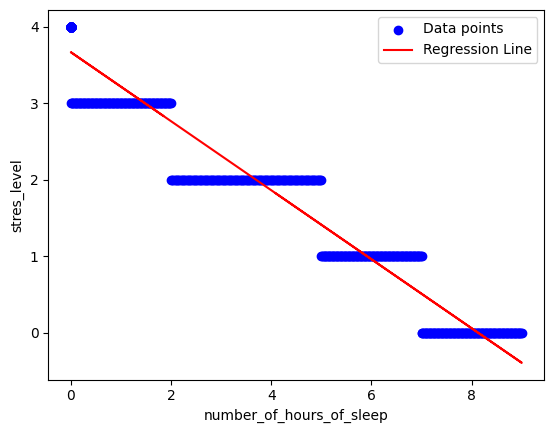

In [46]:
plt.scatter(df['number_of_hours_of_sleep'], df['stress_level'], color='blue', label='Data points')
plt.plot(df['number_of_hours_of_sleep'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('number_of_hours_of_sleep') 
plt.ylabel('stres_level')
plt.legend()
plt.show()

a. Do a Q-Q plot of the pdf of the residuals against N(0,s^2) In addition, draw the residuals histogram and carry out a chi- sqaure test that it follows the normal distribution N(0,s^2).

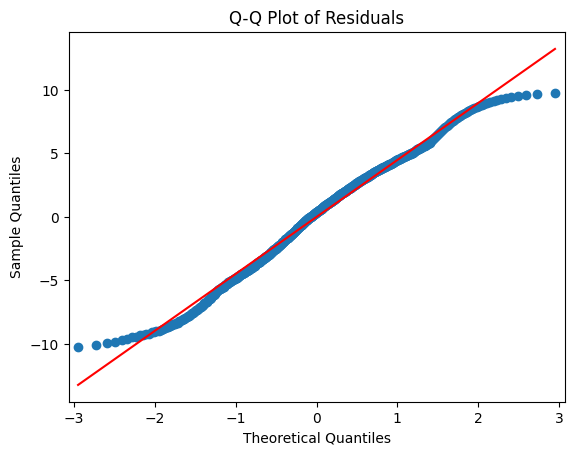

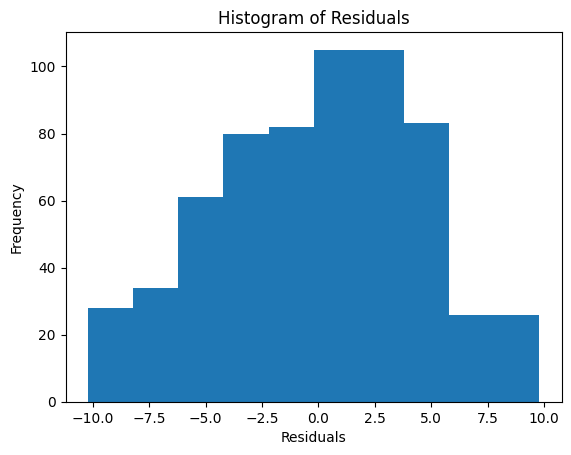

Chi-Square test's p-value
p-value: 3.693865437526256e-05


In [77]:
# from scipy.stats import chisquare

# Q-Q plot
sm.qqplot(model.resid, line='s') # Adding a standard line that fits the model best as 45 deg line doesnt fit the model well
plt.title('Q-Q Plot of Residuals')
plt.show()

# Histogram of the residuals
plt.hist(model.resid)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Chi-squared test is not directly applicable for normality test of residuals
# Hence we are using a Shapiro-Wilk test for normality here:
shapiro_test = stats.shapiro(model.resid)
print("Chi-Square test's p-value")
print("p-value:", shapiro_test[1])

# statistic, pvalue = normaltest(model.resid)
# print(pvalue)

# chi_square_statistic, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

b. Do a scatter plot of the residuals to see if there are any trends.

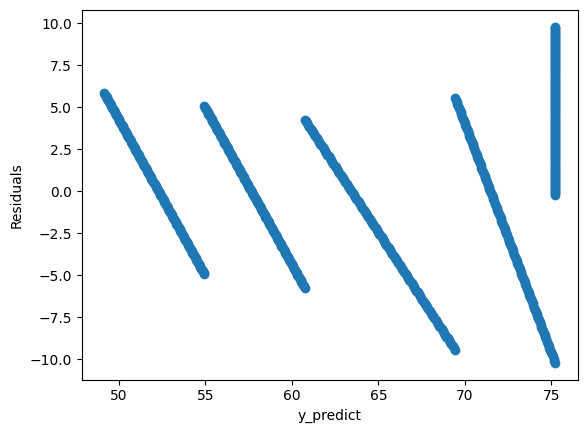

In [78]:
X = sm.add_constant(df['number_of_hours_of_sleep'])
fig, ax = plt.subplots()
ax.scatter(model.predict(X), model.resid)
ax.set_ylabel('Residuals')
ax.set_xlabel('y_predict')
plt.show()

**Observations from plots**

- In the Q-Q plot it is very evident that there are many points that are missing the regression line => **Residuals do not follow the normal distribution**.
- We see that the peak of histogram is not near the center and do not depict any bell shape as well =>  **Residuals do not follow the normal distribution**.
- The p-value you've provided, 7.593614902630136x10^{-16}, is extremely small which is much smaller than the alpha level of 0.05. This means that you would reject the null hypothesis that your residuals follow a normal distribution =>based on this p-value, the test has found statistical evidence that the **residuals do not follow normal distribution**.
- We do not observe any standard pattern from the scatter plot

---

2.5 Use a higher-order polynomial regression, i.e., ( Y = a_0 + a_1X_1 + a_2X_1^2 +e) to see if it gives better results.

In [48]:
df['number_of_hours_of_sleep_squared'] = df['number_of_hours_of_sleep'] ** 2  # This creates the X1^2 term
X_poly = sm.add_constant(df[['number_of_hours_of_sleep_squared', 'number_of_hours_of_sleep']])
model_poly = sm.OLS(df['stress_level'], X_poly).fit()
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:           stress_level   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     6024.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:51:02   Log-Likelihood:                -165.24
No. Observations:                 630   AIC:                             336.5
Df Residuals:                     627   BIC:                             349.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

C:\Users\nayan\AppData\Local\Temp\ipykernel_25112\3463443808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_hours_of_sleep_squared'] = df['number_of_hours_of_sleep'] ** 2  # This creates the X1^2 term


In [68]:
coefficients = model_poly.params
sigma_squared = model_poly.mse_resid
print("The values of Co-effecients:\n")
print("a0:",coefficients['const'])
print("a1:",coefficients['number_of_hours_of_sleep_squared'])
print("a2:",coefficients['number_of_hours_of_sleep'])
print("\n")
print("Varience", sigma_squared)

The values of Co-effecients:

a0: 3.749358639569876
a1: 0.012791277804170073
a2: -0.5523323406004033


Varience 0.09940597946777564


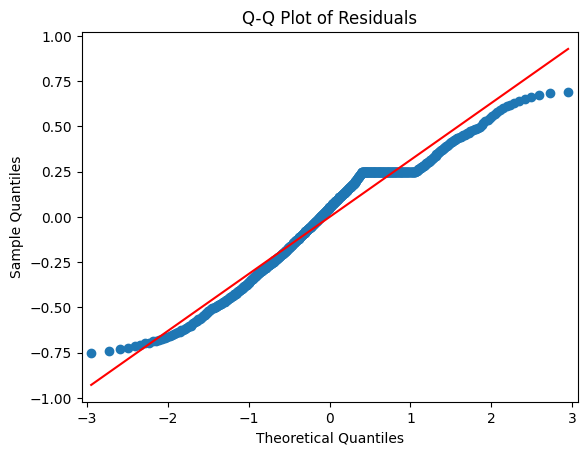

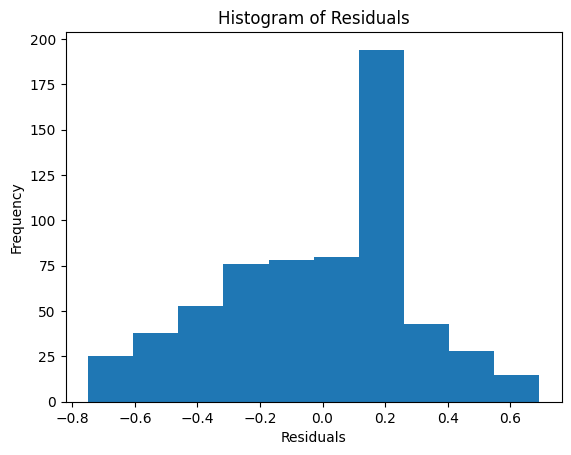

Chi-square test p-value result
p-value: 6.035537521154044e-12


In [73]:
# Q-Q plot
sm.qqplot(model_poly.resid, line='s') # Adding a standard line that fits the model best as 45 deg line doesnt fit the model well
plt.title('Q-Q Plot of Residuals')
plt.show()

# Histogram of the residuals
plt.hist(model_poly.resid)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Chi-squared test is not directly applicable for normality test of residuals
# Hence we are using a Shapiro-Wilk test for normality here:
shapiro_test = stats.shapiro(model_poly.resid)
print("Chi-square test p-value result")
print("p-value:", shapiro_test[1])


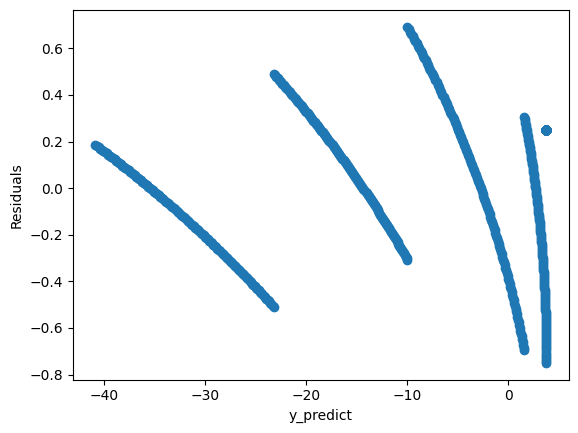

In [74]:
# Box plot
X = sm.add_constant(df[['number_of_hours_of_sleep','number_of_hours_of_sleep_squared']])
fig, ax = plt.subplots()
ax.scatter(model_poly.predict(X), model_poly.resid)
ax.set_ylabel('Residuals')
ax.set_xlabel('y_predict')
# fig.patch.set_facecolor('w')
plt.show()

**Observations from plots**

- In the Q-Q plot many points that are missing the regression line => **Residuals do not follow the normal distribution**.
- We see that the peak of histogram is nearer to center compared to previous histogram but still it is not near the center and do not depict any bell shape as well =>  **Residuals do not follow the normal distribution**.
- The p-value you've provided, 6.035537521154044e-12, is extremely small which is much smaller than the alpha level of 0.05. This means that you would reject the null hypothesis that your residuals follow a normal distribution =>based on this p-value, the test has found statistical evidence that the **residuals do not follow normal distribution**.
- We do not observe any standard pattern from the scatter plot

---

2.6 Comment on your results.

1. The Q-Q plot reveals deviations from the regression line, indicating the residuals do not adhere to a normal distribution.
2. Histogram peaks are not centrally located and lack the expected bell shape, reinforcing that the residuals are not normally distributed.
3. A very small p-value, significantly below the alpha threshold of 0.05, leads to the rejection of the null hypothesis, confirming the residuals do not exhibit normality.
4. The scatter plot of residuals fails to display any recognizable or consistent pattern.

Overall, these observations suggest that the residuals from the regression model do not follow a normal distribution, which might affect the validity of certain statistical inferences.

---

# *Task 3: Multi-variable Linear Regression*

3.1 Carry out a multi-variable regression on all the independent variables, and determine the values for
all the coeefcients, and σ^2.


In [80]:
X = sm.add_constant(df[columns_required])
Y = df['stress_level']

model_multi = sm.OLS(Y, X).fit()

coefficients = model_multi.params
sigma_squared = model_multi.mse_resid

print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:           stress_level   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.311e+05
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:58:41   Log-Likelihood:                 1008.8
No. Observations:                 630   AIC:                            -2008.
Df Residuals:                     625   BIC:                            -1985.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [67]:
print("The values of Co-effecients:\n")
print("a0:",coefficients['const'])
print("a1:",coefficients['number_of_hours_of_sleep'])
print("a2:",coefficients['respitory_range'])
print("a3:",coefficients['heart_rate'])
print("a4:",coefficients['oxygen_in_blood'])
print("a5:",coefficients['rapid_eye_movement'])
print("\n")
print("Varience", sigma_squared)

The values of Co-effecients:

a0: 0.3607552586817948
a1: -0.15085836183543028
a2: -1.2297201995197005
a3: 0.533252088018705
a4: -0.08189797733701769
a5: 0.023221327597369872


Varience 0.0023992899849565293


---

3.2 Based on the p-values, R-square, adjusted R-square, and correlation matrix, identify which independent variables need to be removed (if any) and go back to Step 3.1.


1. **p-values: 0**
p-values for the constant and number_of_hours_of_sleep is 0. Let us assume the confidence level to be 95%. This implies for hypothesis to be accepted the value of p has to be greater than 0.05. But, as we have obtained the p vale as 0 this indicates that the null hypothesis is rejected. 

2. **R-squared (R²): 0.999**
This value indicates that approximately 99.9% of the variance in the dependent variable, stress_level, can be explained by the independent variable, number_of_hours_of_sleep. The R value indicates the correlarion between observed and predicted value and it should be close to 1 which is the case. Greater the R² value better the model fit. As the R-squared value is larger this suggests a strong fit of the model to the data But, R² value cannot determine the significance.

3. **adjusted R-Squared: 0.999**
Adjusted R-squared is a modified version of R-squared that takes into account the number of variables used to make the prediction. It only goes up if adding a new variable actually makes the model better. If adding a new variable doesn't help much or only helps a little bit by random luck, the adjusted R-squared will go down. But here as we are considering only 1 variable there is no change for the adjusted R^2 value. As the adjusted R^2 value is also close to 1 we conclude thhat this is a strong fit of the model to the data.

4. **Correlation matrix** 
We have calculated the correlation matrix in Task 1.3 and identified that number_of_hours_of_sleep, oxygen_in_blood is negatively co-related to stress_level whereas heart rate, rapid_eye_movement and repository_range are positively co-related to stress_level

**Since the p-value is 0 for all the variables also the co-relation matrix either has a strong positive or negative co-relation so we can't remove either of them. Because of these reasons I am proceeding with all the 5 variables and not removing any independent variables. As no independent variables are removed there is no need to go back to 3.1 as it would yield the same result**

---

3.3 Do a residuals analysis:

a. Do a Q-Q plot of the pdf of the residuals against N(0; s2). In addition, draw the residuals
histogram and carry out a chi-squared test that it follows the normal distribution N(0; s2).

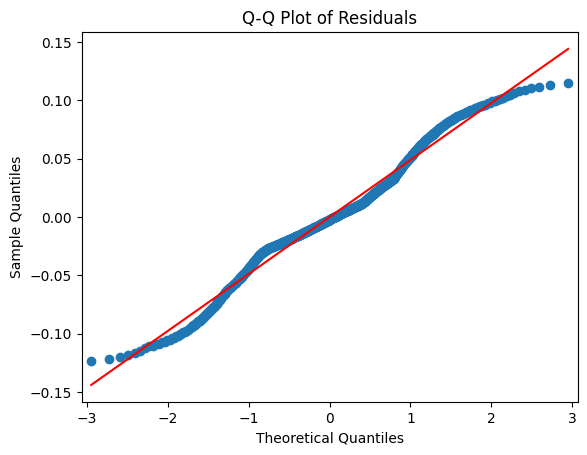

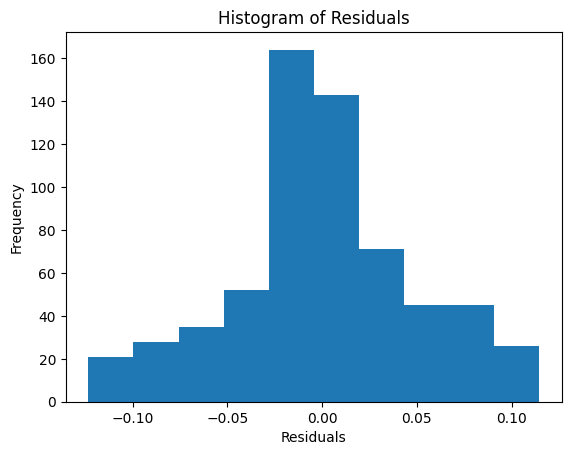

Chi-square test p-value result
p-value: 4.522864571754326e-07


In [82]:
# Q-Q plot
sm.qqplot(model_multi.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Histogram of the residuals
plt.hist(model_multi.resid)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Note: The chi-square test mentioned is not typically used for testing normality of residuals.
# Hence we are using a Shapiro-Wilk test for normality here:
shapiro_test = stats.shapiro(model_multi.resid)
print("Chi-square test p-value result")
print("p-value:", shapiro_test[1])


b. Do a scatter plot of the residuals to see if there are any trends.


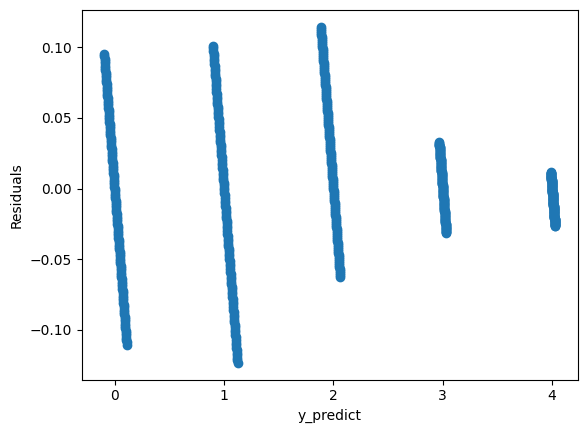

In [66]:
X = sm.add_constant(df[columns_required])
fig, ax = plt.subplots()
ax.scatter(model_multi.predict(X), model_multi.resid)
ax.set_ylabel('Residuals')
ax.set_xlabel('y_predict')
# fig.patch.set_facecolor('w')
plt.show()

**Observations from plots**

- This is the best Q-Q plot that we have got but still even in this Q-Q plot it is very evident that there are points that are missing the regression line i.e., especially in the tails (both left and right), which suggests that the residuals might have heavier tails than a normal distribution. Though the center follows the red line which indicated the normality because of the tails we can conclude that that **residuals do not follow the normal distribution**.
- The histogram gives a visual indication of normality, it is not definitive. In this histogram, the distribution of residuals looks roughly symmetric and bell-shaped around zero, which are characteristics of a normal distribution. However, the peak appears slightly to the left of 0, suggesting some skewness.
- The p-value you've provided, 4.522864571754326^{-7}, is extremely small which is much smaller than the alpha level of 0.05. This means that you would reject the null hypothesis that your residuals follow a normal distribution => based on this p-value, the test has found statistical evidence that the **residuals do not follow normal distribution**.
- The scatter plot does not show any trend

---

3.4 Comment on your results.

In addition to the above observations from the plots which indicate the data is not normally distributed, we can also conclude that given the above points, the residuals of the model are not perfectly normally distributed, as evidenced by the statistical test and the patterns in the Q-Q plot. Despite this, the model exhibits a strong fit with an R-squared value of 0.999. However, caution should be exercised due to the potential for overfitting of the data,. It is good if we can explore further diagnostics, consider transformations or alternative models to account for non-normality and ensure robustness in predictions.